# Home Credit Default Risk
### Msc. Andres Fernando Guaca

Muchas personas luchan para obtener préstamos debido a historiales de crédito insuficientes o inexistentes. Y, desafortunadamente, esta población a menudo es aprovechada por prestamistas no confiables.

Grupo de crédito para el hogar

Home Credit se esfuerza por ampliar la inclusión financiera para la población no bancarizada proporcionando una experiencia de préstamo positiva y segura. Para asegurarse de que esta población desatendida tenga una experiencia de préstamo positiva, Home Credit utiliza una variedad de datos alternativos, incluida la información de telecomunicaciones y transacciones, para predecir la capacidad de pago de sus clientes.

Mientras que Home Credit actualmente usa varios métodos estadísticos y de aprendizaje automático para hacer estas predicciones, están desafiando a Kagglers a ayudarlos a desbloquear todo el potencial de sus datos. Al hacerlo, se asegurará de que los clientes capaces de reembolso no sean rechazados y que los préstamos se otorguen con un calendario de vencimiento y amortización que permitirá a sus clientes tener éxito.


![Texto alternativo](home_credit.png)




## Creación de nuevas variables 

In [1]:
import pandas as pd
app_train=pd.read_csv("application_train.csv")
bureau_balance=pd.read_csv("bureau_balance.csv")
bureau=pd.read_csv("bureau.csv",index_col="SK_ID_BUREAU")

/home/andres/anaconda3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [4]:
bureau.head()

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5714462,215354,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
5714463,215354,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
5714464,215354,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
5714465,215354,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
5714466,215354,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
paso1=bureau_balance.groupby(['SK_ID_BUREAU', 'STATUS']).agg('count')
paso2=paso1.reset_index()
paso3=paso2.pivot(index='SK_ID_BUREAU', columns='STATUS', values='MONTHS_BALANCE')
paso3.columns=['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'BC', 'BX']
paso3.head()
del paso1,paso2,bureau_balance

In [6]:
datos=bureau.join(paso3)

In [7]:
paso1=datos.groupby(['SK_ID_CURR', 'CREDIT_ACTIVE'])["CREDIT_CURRENCY"].agg({'count'}).reset_index()
bureau_1=paso1.pivot(index='SK_ID_CURR', columns='CREDIT_ACTIVE', values='count')
bureau_1.columns=['bureau_Active', 'bureau_Bad_debt', 'bureau_Closed', 'bureau_Sold']
bureau_1.head()

,bureau_Active,bureau_Bad_debt,bureau_Closed,bureau_Sold
SK_ID_CURR,,,,
100001,3.0,NaN,4.0,NaN
100002,2.0,NaN,6.0,NaN
100003,1.0,NaN,3.0,NaN
100004,NaN,NaN,2.0,NaN
100005,2.0,NaN,1.0,NaN


In [8]:
bureau_2=datos.groupby(['SK_ID_CURR'])[["B0","B1","B2","B3","B4","B5","BX","BC"]].sum()

In [9]:
bureau_2.head()

,B0,B1,B2,B3,B4,B5,BX,BC
SK_ID_CURR,,,,,,,,
100001,31.0,1.0,0.0,0.0,0.0,0.0,30.0,110.0
100002,45.0,27.0,0.0,0.0,0.0,0.0,15.0,23.0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,14.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0


In [10]:
app_train=app_train.set_index("SK_ID_CURR").join(bureau_1)
app_train=app_train.join(bureau_2)

In [11]:
app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,bureau_Closed,bureau_Sold,B0,B1,B2,B3,B4,B5,BX,BC
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,6.0,NaN,45.0,27.0,0.0,0.0,0.0,0.0,15.0,23.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,3.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
del bureau_1,bureau_2,paso1

In [13]:
previous_application=pd.read_csv("previous_application.csv")
POS_CASH_balance=pd.read_csv("POS_CASH_balance.csv")
installments_payments=pd.read_csv("installments_payments.csv")
credit_card_balance=pd.read_csv("credit_card_balance.csv")

In [14]:
credit_card_balance_1=credit_card_balance[credit_card_balance["MONTHS_BALANCE"]==-1].groupby(['SK_ID_CURR'])["AMT_BALANCE","AMT_CREDIT_LIMIT_ACTUAL"].agg({"AMT_BALANCE":'sum',"AMT_CREDIT_LIMIT_ACTUAL":"mean","SK_ID_CURR":"count"})#.reset_index()
credit_card_balance_1.columns=['CC_ACTUALES', 'CC_AMT_CREDIT_LIMIT_ACTUAL', 'CC_AMT_BALANCE']

/home/andres/anaconda3/lib/python3.5/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [15]:
credit_card_balance_1.head()

,CC_ACTUALES,CC_AMT_CREDIT_LIMIT_ACTUAL,CC_AMT_BALANCE
SK_ID_CURR,,,
100006,270000,0.000,1
100013,45000,0.000,1
100028,225000,37335.915,1
100042,45000,0.000,1
100043,22500,0.000,1


In [16]:
app_train=app_train.join(credit_card_balance_1)

In [17]:
app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,B1,B2,B3,B4,B5,BX,BC,CC_ACTUALES,CC_AMT_CREDIT_LIMIT_ACTUAL,CC_AMT_BALANCE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,27.0,0.0,0.0,0.0,0.0,15.0,23.0,NaN,NaN,NaN
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270000.0,0.0,1.0
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [18]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [19]:
paso1=POS_CASH_balance[POS_CASH_balance["MONTHS_BALANCE"]==-1].groupby(["SK_ID_CURR","NAME_CONTRACT_STATUS"]).agg({"NAME_CONTRACT_STATUS":"count"})
paso1.columns=["CONTEO"]
paso1=paso1.reset_index()

In [20]:
paso1.head()

,SK_ID_CURR,NAME_CONTRACT_STATUS,CONTEO
0,100002,Active,1
1,100006,Active,1
2,100007,Active,1
3,100009,Active,1
4,100014,Active,1


In [21]:
paso2=paso1.pivot(index='SK_ID_CURR', columns='NAME_CONTRACT_STATUS', values='CONTEO')
paso2.columns=["POS_Active","POS_Amortizeddebt","POS_Approved","POS_Completed","POS_Demand","POS_Returnedtothestore","POS_Signed"]

In [22]:
paso2.head()

,POS_Active,POS_Amortizeddebt,POS_Approved,POS_Completed,POS_Demand,POS_Returnedtothestore,POS_Signed
SK_ID_CURR,,,,,,,
100002,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100006,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100007,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100009,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100014,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
app_train=app_train.join(paso2)

In [24]:
app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_ACTUALES,CC_AMT_CREDIT_LIMIT_ACTUAL,CC_AMT_BALANCE,POS_Active,POS_Amortizeddebt,POS_Approved,POS_Completed,POS_Demand,POS_Returnedtothestore,POS_Signed
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,270000.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


## Análisis exploratorio

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


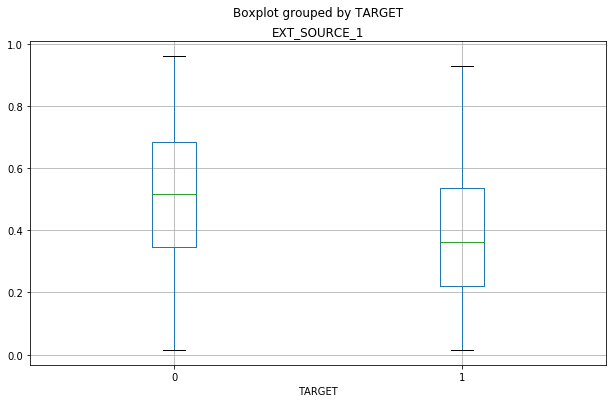

In [26]:
app_train.boxplot("EXT_SOURCE_1",by="TARGET", figsize = (10, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc27bf98b38>,
      dtype=object)

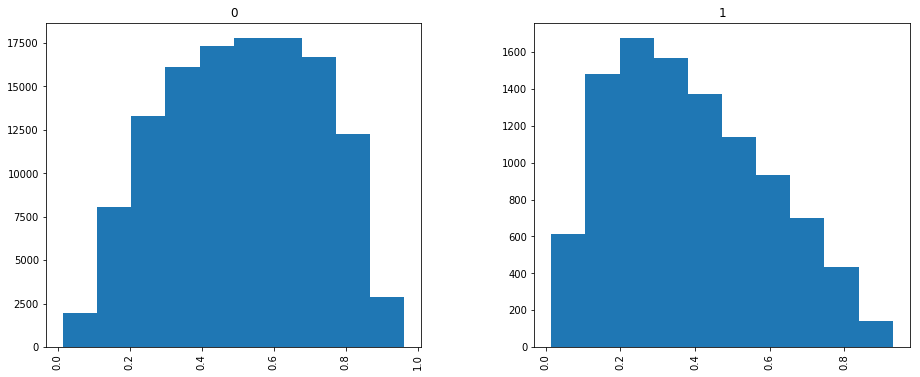

In [27]:
app_train.hist("EXT_SOURCE_1",by="TARGET", figsize = (15, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc29c7b61d0>,
      dtype=object)

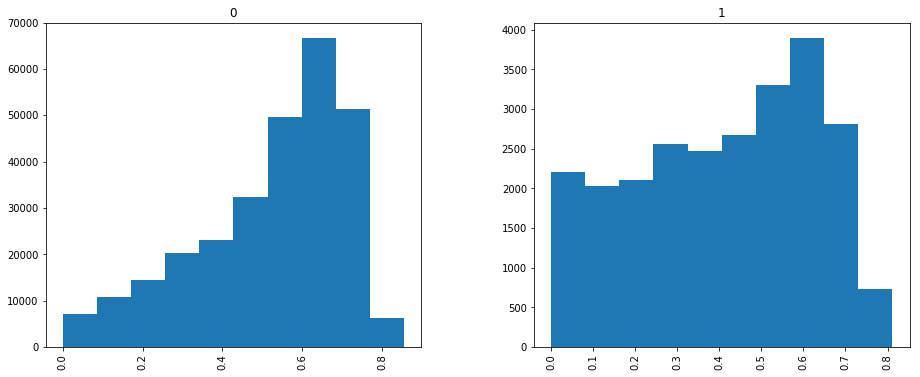

In [28]:
app_train.hist("EXT_SOURCE_2",by="TARGET", figsize = (15, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc27bf2b320>,
      dtype=object)

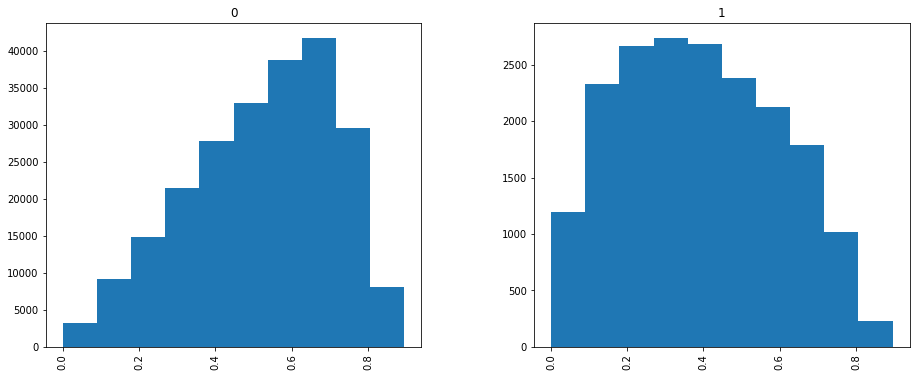

In [29]:
app_train.hist("EXT_SOURCE_3",by="TARGET", figsize = (15, 6))

In [30]:
A=app_train.groupby(["OCCUPATION_TYPE","TARGET"]).agg({"TARGET":"count"})
A.columns=["CONTEO"]

In [31]:
A=A.reset_index()

In [32]:
D=A[A["TARGET"]==1][["OCCUPATION_TYPE","CONTEO"]]

In [33]:
DV=A.groupby(["OCCUPATION_TYPE"]).agg({"CONTEO":"sum"})
DV.columns=["TOTAL"]

In [34]:
RES=DV.join(D.set_index("OCCUPATION_TYPE"))

In [35]:
RES=RES["CONTEO"]/RES["TOTAL"]

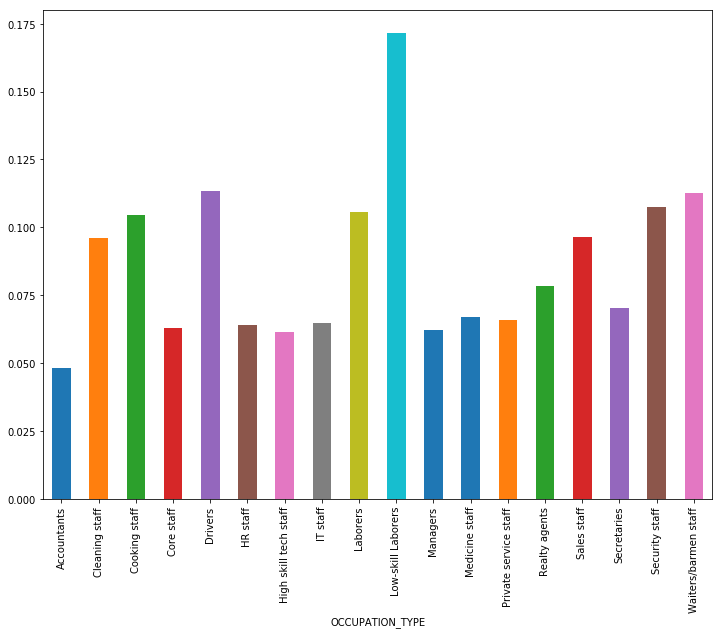

In [36]:
RES.plot.bar( figsize = (12, 9))

## Modelado

In [37]:
import h2o

#app_test.loc[17177,"REGION_RATING_CLIENT_W_CITY"]=1

#evaluacion[evaluacion["REGION_RATING_CLIENT_W_CITY"]==-1]["REGION_RATING_CLIENT_W_CITY"]

h2o.init(max_mem_size=14)
train = h2o.H2OFrame(app_train)
#evaluacion_h2o = h2o.H2OFrame(app_test)

train["TARGET"]= train["TARGET"].asfactor()  

#train.types["AMT_INCOME_TOTAL"]

train["CODE_GENDER"]= train["CODE_GENDER"].asfactor()  

train["FLAG_OWN_CAR"]= train["FLAG_OWN_CAR"].asfactor()  

train["FLAG_OWN_REALTY"]= train["FLAG_OWN_REALTY"].asfactor()  

train["CNT_CHILDREN"]= train["CNT_CHILDREN"].asnumeric() 

train["AMT_INCOME_TOTAL"]= train["AMT_INCOME_TOTAL"].asnumeric() 

train["AMT_CREDIT"]= train["AMT_CREDIT"].asnumeric() 

train["AMT_ANNUITY"]= train["AMT_ANNUITY"].asnumeric() 

train["AMT_GOODS_PRICE"]= train["AMT_GOODS_PRICE"].asnumeric() 

train["NAME_TYPE_SUITE"]= train["NAME_TYPE_SUITE"].asfactor()  

train["NAME_INCOME_TYPE"]= train["NAME_INCOME_TYPE"].asfactor()  

train["NAME_EDUCATION_TYPE"]= train["NAME_EDUCATION_TYPE"].asfactor()  

train["NAME_FAMILY_STATUS"]= train["NAME_FAMILY_STATUS"].asfactor()  

train["NAME_HOUSING_TYPE"]= train["NAME_HOUSING_TYPE"].asfactor()  

train["REGION_POPULATION_RELATIVE"]= train["REGION_POPULATION_RELATIVE"].asnumeric() 

train["DAYS_BIRTH"]= train["DAYS_BIRTH"].asnumeric() 

train["DAYS_EMPLOYED"]= train["DAYS_EMPLOYED"].asnumeric() 

train["DAYS_REGISTRATION"]= train["DAYS_REGISTRATION"].asnumeric() 

train["DAYS_ID_PUBLISH"]= train["DAYS_ID_PUBLISH"].asnumeric() 

train["OWN_CAR_AGE"]= train["OWN_CAR_AGE"].asnumeric() 

train["FLAG_MOBIL"]= train["FLAG_MOBIL"].asfactor() 

train["FLAG_EMP_PHONE"]= train["FLAG_EMP_PHONE"].asfactor() 

train["FLAG_WORK_PHONE"]= train["FLAG_WORK_PHONE"].asfactor() 

train["FLAG_CONT_MOBILE"]= train["FLAG_CONT_MOBILE"].asfactor() 

train["FLAG_PHONE"]= train["FLAG_PHONE"].asfactor() 

train["FLAG_EMAIL"]= train["FLAG_EMAIL"].asfactor() 

train["OCCUPATION_TYPE"]= train["OCCUPATION_TYPE"].asfactor() 

train["CNT_FAM_MEMBERS"]= train["CNT_FAM_MEMBERS"].asnumeric() 

train["REGION_RATING_CLIENT"]= train["REGION_RATING_CLIENT"].asfactor() 

##Valor por revisar
train["REGION_RATING_CLIENT_W_CITY"]= train["REGION_RATING_CLIENT_W_CITY"].asfactor() 

train["WEEKDAY_APPR_PROCESS_START"]= train["WEEKDAY_APPR_PROCESS_START"].asfactor() 

train["HOUR_APPR_PROCESS_START"]= train["HOUR_APPR_PROCESS_START"].asfactor() 

train["REG_REGION_NOT_LIVE_REGION"]= train["REG_REGION_NOT_LIVE_REGION"].asfactor() 

train["REG_REGION_NOT_WORK_REGION"]= train["REG_REGION_NOT_WORK_REGION"].asfactor() 

train["LIVE_REGION_NOT_WORK_REGION"]= train["LIVE_REGION_NOT_WORK_REGION"].asfactor() 

train["REG_CITY_NOT_LIVE_CITY"]= train["REG_CITY_NOT_LIVE_CITY"].asfactor() 

train["REG_CITY_NOT_WORK_CITY"]= train["REG_CITY_NOT_WORK_CITY"].asfactor() 

train["LIVE_CITY_NOT_WORK_CITY"]= train["LIVE_CITY_NOT_WORK_CITY"].asfactor() 

train["ORGANIZATION_TYPE"]= train["ORGANIZATION_TYPE"].asfactor()  ##Se puede crear grupos

train["EXT_SOURCE_1"]= train["EXT_SOURCE_1"].asnumeric() 

train["EXT_SOURCE_2"]= train["EXT_SOURCE_2"].asnumeric() 

train["EXT_SOURCE_3"]= train["EXT_SOURCE_3"].asnumeric() 

train["APARTMENTS_MODE"]= train["APARTMENTS_MODE"].asnumeric() 

train["LIVINGAPARTMENTS_MODE"]= train["LIVINGAPARTMENTS_MODE"].asnumeric() 

train["APARTMENTS_AVG"]= train["APARTMENTS_AVG"].asnumeric() 

train["BASEMENTAREA_AVG"]= train["BASEMENTAREA_AVG"].asnumeric() 

train["COMMONAREA_AVG"]= train["COMMONAREA_AVG"].asnumeric() 

train["ELEVATORS_AVG"]= train["ELEVATORS_AVG"].asnumeric() 

train["FLOORSMIN_AVG"]= train["FLOORSMIN_AVG"].asnumeric() 

train["LANDAREA_AVG"]= train["LANDAREA_AVG"].asnumeric() 

train["LIVINGAPARTMENTS_AVG"]= train["LIVINGAPARTMENTS_AVG"].asnumeric() 

train["NONLIVINGAPARTMENTS_AVG"]= train["NONLIVINGAPARTMENTS_AVG"].asnumeric() 

train["NONLIVINGAREA_AVG"]= train["NONLIVINGAREA_AVG"].asnumeric() 

train["BASEMENTAREA_MODE"]= train["BASEMENTAREA_MODE"].asnumeric() 

train["COMMONAREA_MODE"]= train["COMMONAREA_MODE"].asnumeric() 

train["LANDAREA_MODE"]= train["LANDAREA_MODE"].asnumeric() 

train["NONLIVINGAPARTMENTS_MODE"]= train["NONLIVINGAPARTMENTS_MODE"].asnumeric() 

train["NONLIVINGAREA_MODE"]= train["NONLIVINGAREA_MODE"].asnumeric() 

train["BASEMENTAREA_MEDI"]= train["BASEMENTAREA_MEDI"].asnumeric() 

train["COMMONAREA_MEDI"]= train["COMMONAREA_MEDI"].asnumeric() 

train["LANDAREA_MEDI"]= train["LANDAREA_MEDI"].asnumeric() 

train["LIVINGAPARTMENTS_MEDI"]= train["LIVINGAPARTMENTS_MEDI"].asnumeric() 

train["NONLIVINGAPARTMENTS_MEDI"]= train["NONLIVINGAPARTMENTS_MEDI"].asnumeric() 

train["NONLIVINGAREA_MEDI"]= train["NONLIVINGAREA_MEDI"].asnumeric() 

train["APARTMENTS_MEDI"]= train["APARTMENTS_MEDI"].asnumeric() 


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /home/andres/anaconda3/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx1de9o5t
  JVM stdout: /tmp/tmpx1de9o5t/h2o_andres_started_from_python.out
  JVM stderr: /tmp/tmpx1de9o5t/h2o_andres_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/Bogota
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.7
H2O cluster version age:,1 month and 3 days
H2O cluster name:,H2O_from_python_andres_eujx1w
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


/home/andres/anaconda3/lib/python3.5/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [38]:
variables_todas=['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [40]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
splits = train.split_frame(ratios=[0.7], seed=123)   

mod=H2ORandomForestEstimator(nfolds=5,keep_cross_validation_predictions=True,max_depth=20,min_rows=20,ntrees=300)
mod.train(x=list(set(variables_todas) - set(['SK_ID_CURR', 'TARGET'])), y="TARGET", training_frame=splits[0])

drf Model Build progress: |███████████████████████████████████████████████| 100%


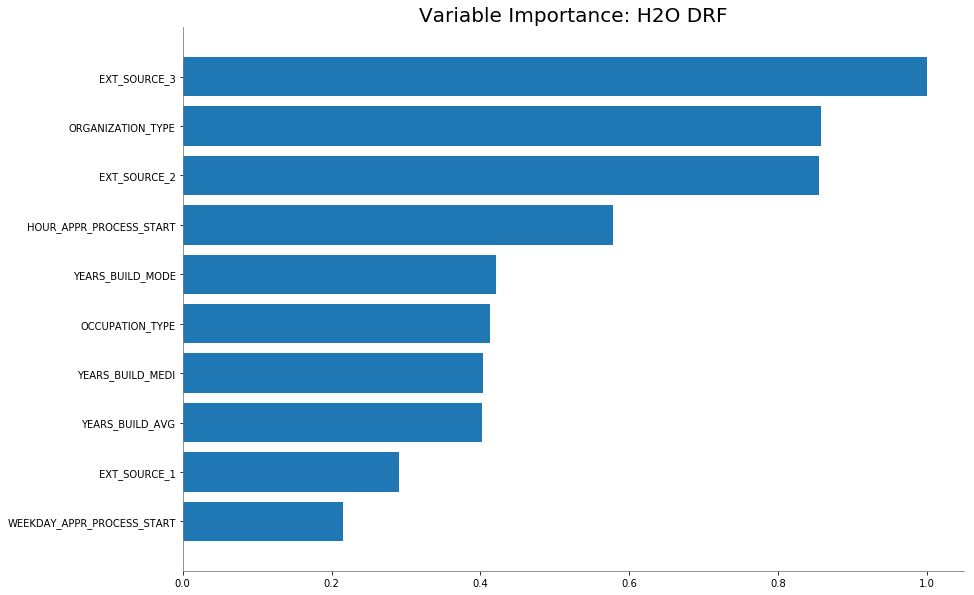

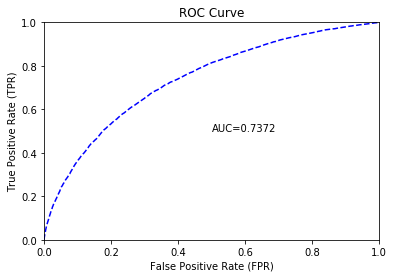

In [41]:
mod.varimp_plot()
mod.model_performance(splits[1]).plot()

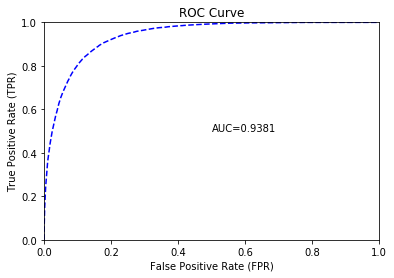

In [43]:
mod.model_performance(splits[0]).plot()

In [44]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

mod=H2OGradientBoostingEstimator()
mod.train(x=list(set(variables_todas) - set(['SK_ID_CURR', 'TARGET'])), y="TARGET", training_frame=splits[0])



gbm Model Build progress: |███████████████████████████████████████████████| 100%


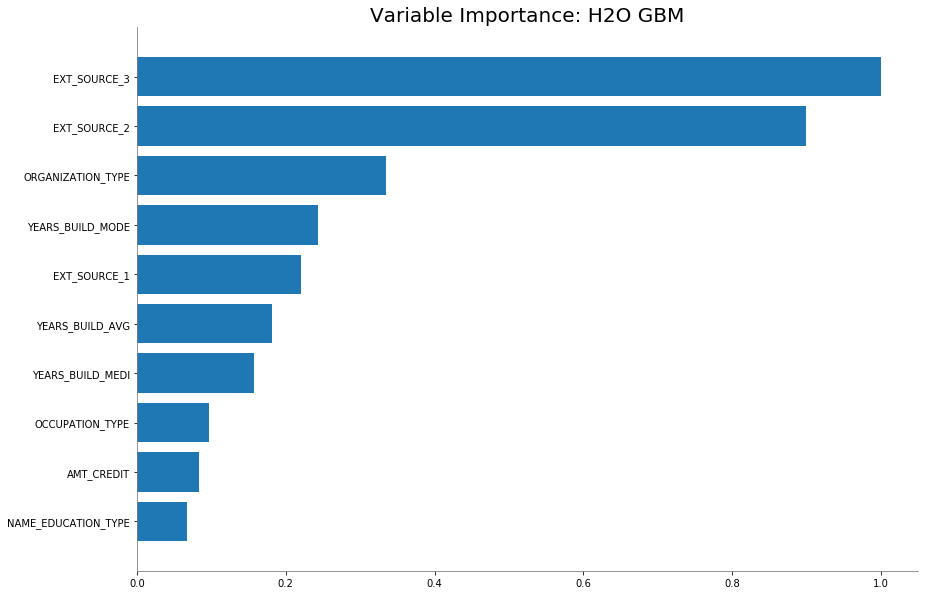

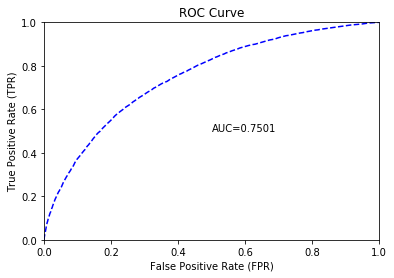

In [45]:
mod.varimp_plot()
mod.model_performance(splits[1]).plot()

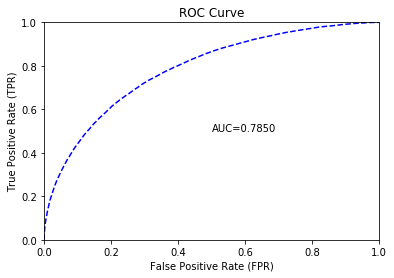

In [47]:
mod.model_performance(splits[0]).plot()